In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
# import pyreadr
from upsetplot import UpSet

In [2]:
pwd

'/work/project/ladcol_011/MariaWF/cellchat/community-paper/src/method_comparison/compare_databases/compare_results'

In [3]:
curated_predicted = pd.read_csv("inputs/pairs_curated_predicted.csv")

In [4]:
# curated_predicted = curated_predicted.set_index('ID')[['community', 'CPDB', 'NicheNet', 'CellChat', 'community_curated', 'NicheNet_curated']]

In [5]:
curated_predicted = curated_predicted.set_index('ID')[['community', 'CPDB', 'NicheNet', 'CellChat']]

In [6]:
counts_curated_predicted = curated_predicted.value_counts()

<Figure size 2000x800 with 0 Axes>

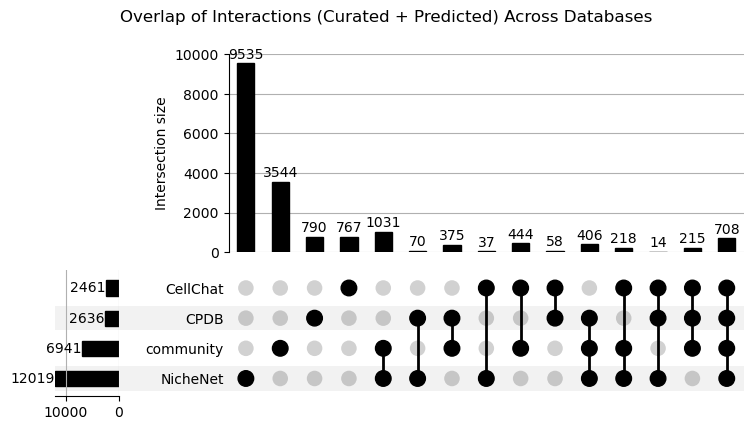

In [7]:
plt.figure(figsize=(20, 8))
upset = UpSet(counts_curated_predicted, show_counts=True, sort_by='degree', intersection_plot_elements = 6)
upset.plot()
plt.suptitle('Overlap of Interactions (Curated + Predicted) Across Databases ')
plt.show()

In [9]:
curated_pairs = pd.read_csv("inputs/pairs_curated.csv")
curated_pairs = curated_pairs.set_index('ID')[['community', 'CPDB', 'NicheNet', 'CellChat']]
counts_curated_pairs = curated_pairs.value_counts()

In [10]:
filtered_cc = curated_pairs[
    (curated_pairs['CellChat'] == True) &  # CellChat column should be True
    (curated_pairs.drop(columns='CellChat') == False).all(axis=1)]

In [11]:
filtered_list = filtered_cc.index.tolist()

In [12]:
len(filtered_list)

1140

In [13]:
count = 0
for pair in filtered_list:
    if pair.count("_") == 1:
        splitted = pair.split("_")
        new_pair = splitted[1] + "_" + splitted[0]

        if new_pair in curated_pairs.index:
            count += 1
print(count)

82


In [14]:
count = 0
for pair in filtered_list:
    if pair.count("_") > 1:
        count += 1
print(count)

0


<Figure size 2000x800 with 0 Axes>

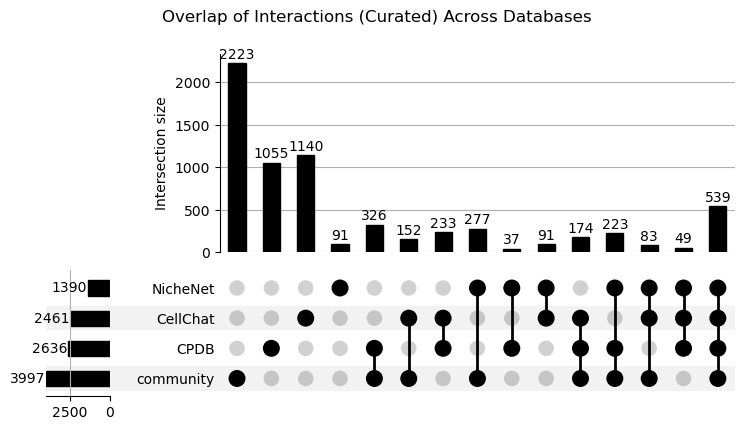

In [15]:
plt.figure(figsize=(20, 8))
upset = UpSet(counts_curated_pairs, show_counts=True, sort_by='degree')
upset.plot()
plt.suptitle('Overlap of Interactions (Curated) Across Databases ')
plt.show()

In [16]:
curated_predicted_genes = pd.read_csv("inputs/genes_curated_predicted.csv")
curated_predicted_genes = curated_predicted_genes.set_index('ID')[['community', 'CPDB', 'NicheNet', 'CellChat']]
counts_curated_predicted_genes = curated_predicted_genes.value_counts()

<Figure size 2000x800 with 0 Axes>

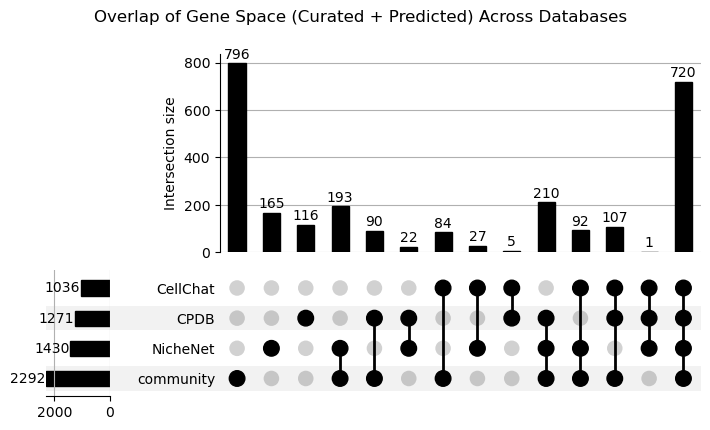

In [17]:
plt.figure(figsize=(20, 8))
upset = UpSet(counts_curated_predicted_genes, show_counts=True, sort_by='degree')
upset.plot()
plt.suptitle('Overlap of Gene Space (Curated + Predicted) Across Databases ')
plt.show()

In [18]:
curated_genes = pd.read_csv("inputs/genes_curated.csv")
curated_genes = curated_genes.set_index('ID')[['community', 'CPDB', 'NicheNet', 'CellChat']]
counts_curated_genes = curated_genes.value_counts()

<Figure size 2000x800 with 0 Axes>

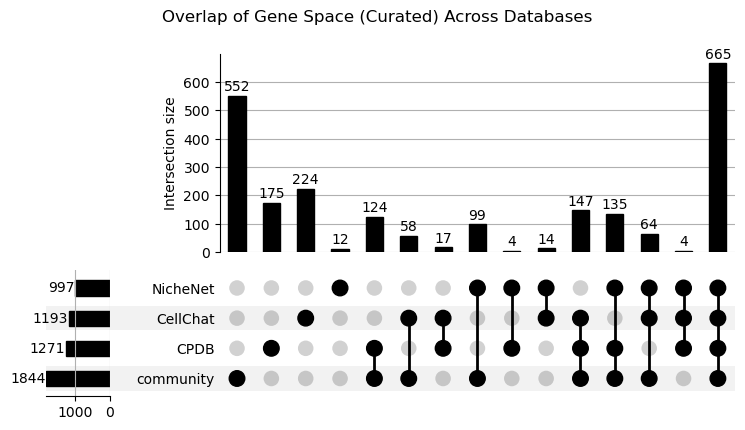

In [19]:
plt.figure(figsize=(20, 8))
upset = UpSet(counts_curated_genes, show_counts=True, sort_by='degree')
upset.plot()
plt.suptitle('Overlap of Gene Space (Curated) Across Databases ')
plt.show()